In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crimes.csv', parse_dates=["Date Rptd","DATE OCC"], dtype={"TIME OCC": str})

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [5]:
# Extract the first two digits from "TIME OCC", representing the hour
# and convert to integer data type
df['HOUR OCC'] = df['TIME OCC'].str[:2].astype(int) 

In [6]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


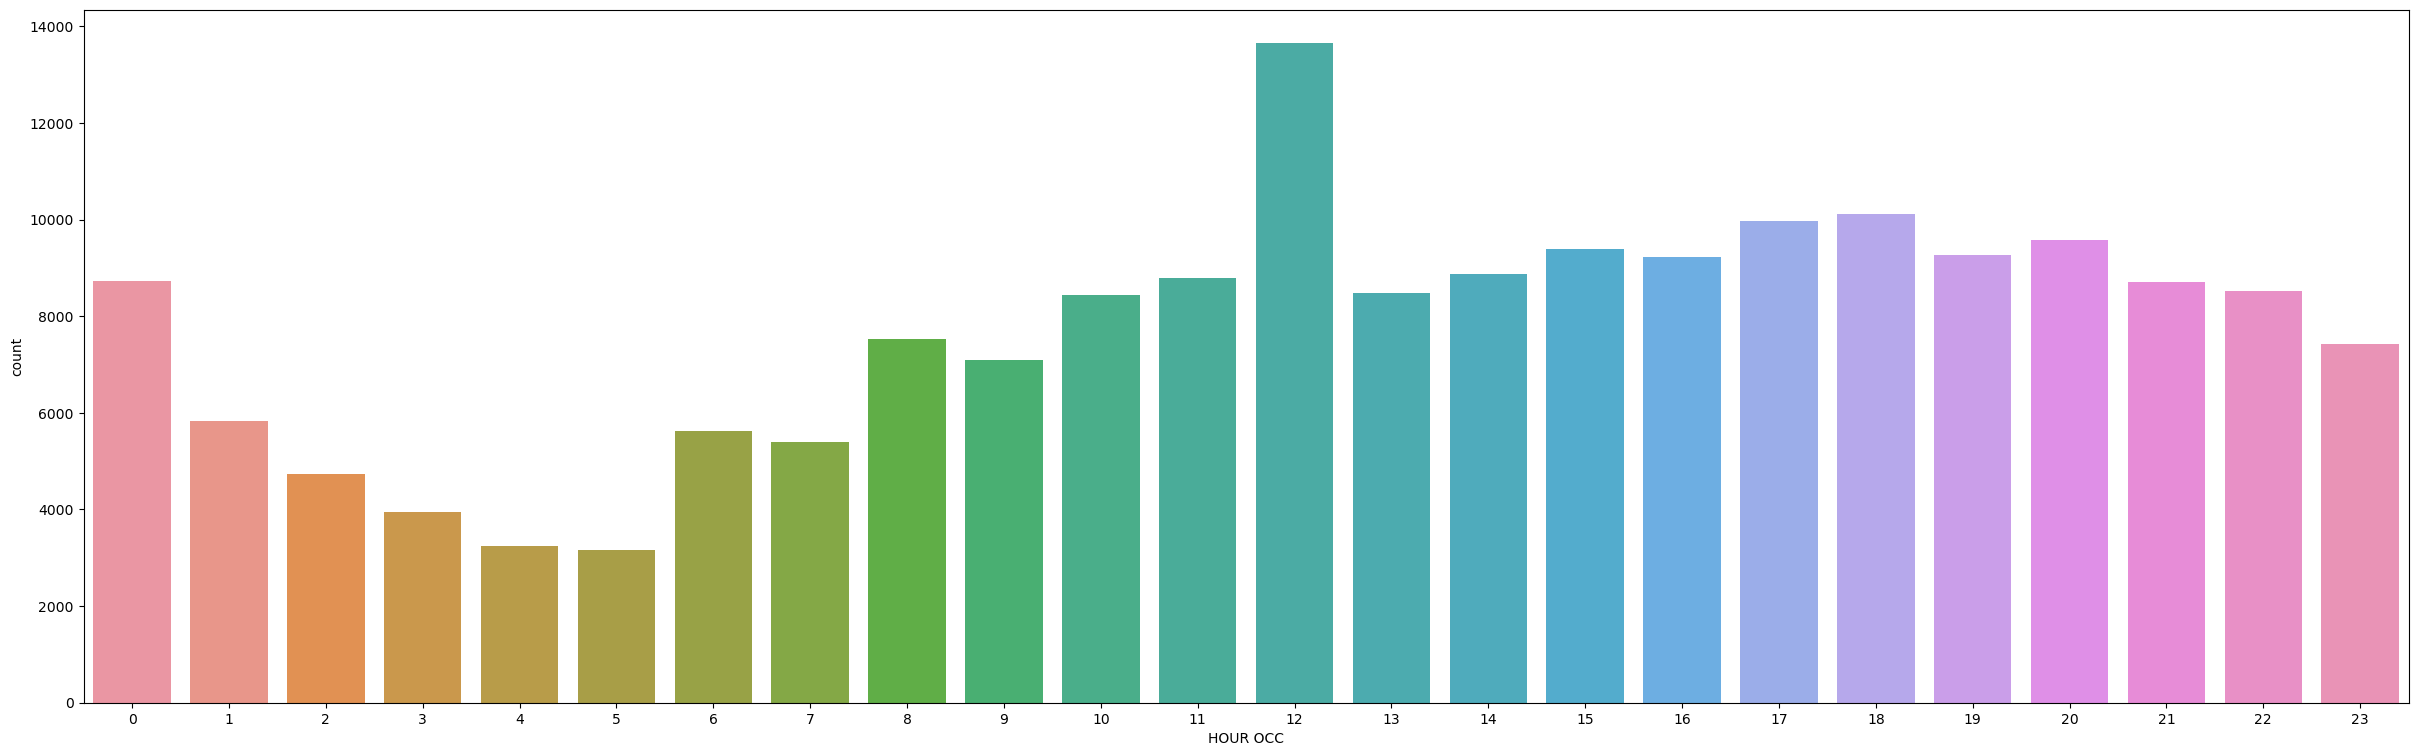

In [23]:
# Produce a countplot to find the largest frequency of crimes by hour
plt.figure(figsize = (30,9))
sns.countplot(data = df, x = 'HOUR OCC')
plt.show()

#  As we can see the highest crime peek is 12 hour
peak_crime_hour = 12

### Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
#### Filter for the night-time hours

In [8]:
night_time = df[df["HOUR OCC"].isin([22,23,0,1,2,3])] # 0 = midnight; 3 = crimes between 3am and 3:59am,

In [9]:
night_time

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
30,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185687,231306158,2023-02-11,2023-02-08,2200,Newton,BURGLARY FROM VEHICLE,38,M,H,NaN,Invest Cont,1700 E 16TH ST,22
185695,231212224,2023-05-17,2023-05-17,2300,77th Street,VIOLATION OF RESTRAINING ORDER,35,F,H,NaN,Invest Cont,8200 S MAIN ST,23
185700,231300825,2023-06-07,2023-06-07,2203,Newton,BATTERY - SIMPLE ASSAULT,45,F,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST,22
185701,230908346,2023-04-19,2023-04-18,2243,Van Nuys,THEFT OF IDENTITY,34,F,B,NaN,Invest Cont,4800 COLDWATER CANYON AV,22


### What is the highest peak night_crime_location

In [24]:
peak_night_crime_location = night_time.groupby('AREA NAME',as_index = False)['HOUR OCC'].count().sort_values('HOUR OCC',ascending = False).iloc[0]["AREA NAME"]

In [25]:
peak_night_crime_location

'Central'

In [12]:
location_counts = night_time['AREA NAME'].value_counts()

In [13]:
location_counts

AREA NAME
Central        3312
Hollywood      2699
77th Street    2558
Southwest      2347
Southeast      2218
Newton         2142
Olympic        2137
Pacific        1916
Rampart        1860
N Hollywood    1855
Wilshire       1716
Northeast      1684
Van Nuys       1629
West Valley    1520
Topanga        1461
Mission        1453
Harbor         1384
West LA        1369
Devonshire     1348
Hollenbeck     1315
Foothill       1260
Name: count, dtype: int64

- The highest peek night crime location is Central

## Identifying the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+)

In [14]:
conditions = [
    (df['Vict Age'] >= 0) & (df['Vict Age'] <= 17),
    (df['Vict Age'] >= 18) & (df['Vict Age'] <= 25),
    (df['Vict Age'] >= 26) & (df['Vict Age'] <= 34),
    (df['Vict Age'] >= 35) & (df['Vict Age'] <= 44),
    (df['Vict Age'] >= 45) & (df['Vict Age'] <= 54),
    (df['Vict Age'] >= 55) & (df['Vict Age'] <= 65),
    (df['Vict Age'] > 65) 
]

choices = ['0-17','18-25','26-34','35-44','45-54','55-65','65+']

In [15]:
df['Age Bracket'] = np.select(conditions, choices, default='Other')

In [16]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC,Age Bracket
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-65
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9,65+


## category with the largest frequency

In [17]:
Victim_Ages = df['Age Bracket'].value_counts()

In [18]:
Victim_Ages

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-65    21657
65+      13259
0-17      4528
Name: count, dtype: int64

#### As we can see Age between 0-17 have the highest frequency means people b/w 0-17 are exploited most

In [19]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC,Age Bracket
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-65
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9,65+


In [20]:
df['Status Desc'].value_counts() # as we can see  Status Desc is mostly Invest cont

Status Desc
Invest Cont     153790
Adult Other      17722
Adult Arrest     13397
Juv Arrest         492
Juv Other          312
UNK                  2
Name: count, dtype: int64

In [21]:
df['Weapon Desc'].value_counts().sort_values(ascending=False).head(9)

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    39889
UNKNOWN WEAPON/OTHER WEAPON                        7376
VERBAL THREAT                                      5894
HAND GUN                                           4395
KNIFE WITH BLADE 6INCHES OR LESS                   1608
SEMI-AUTOMATIC PISTOL                              1558
OTHER KNIFE                                        1504
UNKNOWN FIREARM                                    1222
MACE/PEPPER SPRAY                                   948
Name: count, dtype: int64

In [27]:
df['Status Desc'].value_counts()

Status Desc
Invest Cont     153790
Adult Other      17722
Adult Arrest     13397
Juv Arrest         492
Juv Other          312
UNK                  2
Name: count, dtype: int64